---
title: SPI - Defining bespoke and archetypal context-dependent Soundscape Perception Indices
author:
  - name: Andrew Mitchell
    email: andrew.mitchell.18@ucl.ac.uk
    affiliations: 
        - id: ucl-iede
          name: University College London
          department: Institute for Environmental Design & Engineering
    attributes:
        corresponding: true
  - name: Francesco Aletta
    email: f.aletta@ucl.ac.uk
    affiliations:
        - ref: ucl-iede
  - name: Tin Oberman
    email: t.oberman@ucl.ac.uk
    affiliations:
        - ref: ucl-iede
  - name: Jian Kang
    email: j.kang@ucl.ac.uk
    affilations:
        - ref: ucl-iede
abstract: |
    The soundscape approach provides a basis for considering the holistic perception of sound environments, in context. While steady advancements have been made in methods for assessment and analysis, a gap exists for comparing soundscapes and quantifying improvements in the multi-dimensional perception of a soundscape. To this end, there is a need for the creation of single value indices to compare soundscape quality which incorporate context, aural diversity, and specific design goals for a given application. Just as a variety of decibel-based indices have been developed for various purposes (e.g. LAeq, LCeq, L90, Lden, etc.), the soundscape approach requires the ability to create novel indices for different uses, but which share a common language and understanding. We therefore propose a unified framework for creating both bespoke and standardised single index measures of soundscape perception based on the soundscape circumplex model, allowing for new metrics to be defined in the future. The implementation of this framework is demonstrated through the creation of a public spaced typology-based index using data collected under the SSID Protocol, which was designed specifically for the purpose of defining soundscape indices. Indices developed under this framework can enable a broader and more efficient application of the soundscape approach.
keywords: 
  - keyword1
  - keyword2
date: last-modified

---

# Setup

## Import Libraries


In [1]:
import soundscapy as sspy
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
import utils
import rpyskewnorm as snpy
import numpy as np
from MultiSkewNorm import MultiSkewNorm

import warnings

warnings.filterwarnings("ignore")

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/J2401_JASA_SSID-Single-Index/.venv/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:252: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/J2401_JASA_SSID-Single-Index/.venv/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


## Load Data

In addition to loading the latest version of the ISD, we also exclude a few samples that were identified as survey outliers. Most notably, this includes the samples at RegentsParkFields which were impacted by helicopter flyovers.

In [2]:
# Load latest ISD dataset
# data = sspy.isd.load_zenodo()
# Load latest ISD dataset
isd_file = Path("ISD v1.0 Data.csv")

data = pd.read_csv(isd_file, low_memory=False)
data, excl_data = sspy.isd.validate(data)
data = data.query("Language != 'cmn'")

# Exclude RegentsParkJapan outliers
# excl_id = list(data.query("LocationID == 'RegentsParkJapan'").query("ISOEventful > 0.72 | ISOEventful < -0.5").index)
# Excluded RegentsParkFields outliers
# excl_id = excl_id + list(data.query("LocationID == 'RegentsParkFields' and ISOPleasant < 0").index) # Helicopters
excl_id = [652, 706, 548, 550, 551, 553, 569, 580, 609, 618, 623, 636, 643]
data.drop(excl_id, inplace=True)
data

Renaming PAQ columns.
Checking PAQ data quality.
Identified 109 samples to remove.
[6, 9, 13, 30, 32, 46, 190, 213, 229, 244, 296, 412, 413, 428, 464, 485, 655, 734, 739, 762, 766, 780, 1067, 1274, 1290, 1316, 1320, 1338, 1346, 1347, 1397, 1425, 1431, 1446, 1447, 1470, 1485, 1491, 1504, 1505, 1510, 1512, 1517, 1522, 1523, 1527, 1599, 1698, 1734, 1817, 1911, 1948, 2069, 2107, 2109, 2111, 2150, 2199, 2277, 2293, 2384, 2386, 2490, 2523, 2584, 2592, 2695, 2762, 2767, 2783, 2789, 2825, 2826, 2832, 2840, 2856, 2859, 2879, 2883, 2889, 2910, 2932, 2956, 2969, 3031, 3058, 3077, 3124, 3149, 3163, 3185, 3202, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3272, 3302, 3365, 3414, 3491, 3502, 3510, 3517, 3533, 3583]


,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,RA_cp90,RA_cp95,THD_THD,THD_Min,THD_Max,THD_L5,THD_L10,THD_L50,THD_L90,THD_L95
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Noorderplantsoen,Noorderplantsoen1,NP161,61,2020-03-11 12:42:00,2020-03-11 12:55:00,NaN,NaN,nld,nldSSIDv1,...,2.54,2.00,-3.17,-11.97,59.64,37.87,26.54,6.33,-9.79,-10.34
1694,Noorderplantsoen,Noorderplantsoen1,NP162,63,2020-03-11 12:39:00,2020-03-11 13:00:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,Noorderplantsoen,Noorderplantsoen1,NP162,62,2020-03-11 12:54:00,2020-03-11 12:58:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,Noorderplantsoen,Noorderplantsoen1,NP162,64,2020-03-11 12:56:00,2020-03-11 12:59:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ISOCoordinate calculation according to Aletta et. al. (2024)



To move the 8-item PAQ responses into the 2-dimensional circumplex space, we use the projection method first presented in ISO 12913-3:2018. This projection method and its associated formulae were recently updated further in @Aletta2024 to include a correction for the language in which the survey was conducted. The formulae are as follows:

$$
% \begin{align*}
P_{ISO} = \frac{1}{\lambda_{pl}} \sum_{i=1}^{8} \cos \theta_i \cdot \sigma_i \\
E_{ISO} = \frac{1}{\lambda_{pl}} \sum_{i=1}^{8} \sin \theta_i \cdot \sigma_i 
% \end{align*}
$$

where $\text{PAQ}_i\$ is the response to the \(i\)th item of the PAQ. The resulting \(x\) and \(y\) values are then used to calculate the polar angle \(\theta\) and the radial distance \(r\) as follows:

In [3]:
from soundscapy.utils.parameters import LANGUAGE_ANGLES, PAQ_IDS

LANGUAGE_ANGLES

{'eng': (0, 46, 94, 138, 177, 241, 275, 340),
 'arb': (0, 36, 45, 135, 167, 201, 242, 308),
 'cmn': (0, 18, 38, 154, 171, 196, 217, 318),
 'hrv': (0, 84, 93, 160, 173, 243, 273, 354),
 'nld': (0, 43, 111, 125, 174, 257, 307, 341),
 'deu': (0, 64, 97, 132, 182, 254, 282, 336),
 'ell': (0, 72, 86, 133, 161, 233, 267, 328),
 'ind': (0, 53, 104, 123, 139, 202, 284, 308),
 'ita': (0, 57, 104, 143, 170, 274, 285, 336),
 'spa': (0, 41, 103, 147, 174, 238, 279, 332),
 'swe': (0, 66, 87, 146, 175, 249, 275, 335),
 'tur': (0, 55, 97, 106, 157, 254, 289, 313)}

In [4]:
#| label: tbl-lang-angles
#| tbl-cap: Language-specific angles for projection into the ISO 12913-3:2018 circumplex space.
tab = pd.DataFrame.from_dict(LANGUAGE_ANGLES, orient='index', columns=PAQ_IDS)
tab

,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8
eng,0,46,94,138,177,241,275,340
arb,0,36,45,135,167,201,242,308
cmn,0,18,38,154,171,196,217,318
hrv,0,84,93,160,173,243,273,354
nld,0,43,111,125,174,257,307,341
deu,0,64,97,132,182,254,282,336
ell,0,72,86,133,161,233,267,328
ind,0,53,104,123,139,202,284,308
ita,0,57,104,143,170,274,285,336
spa,0,41,103,147,174,238,279,332


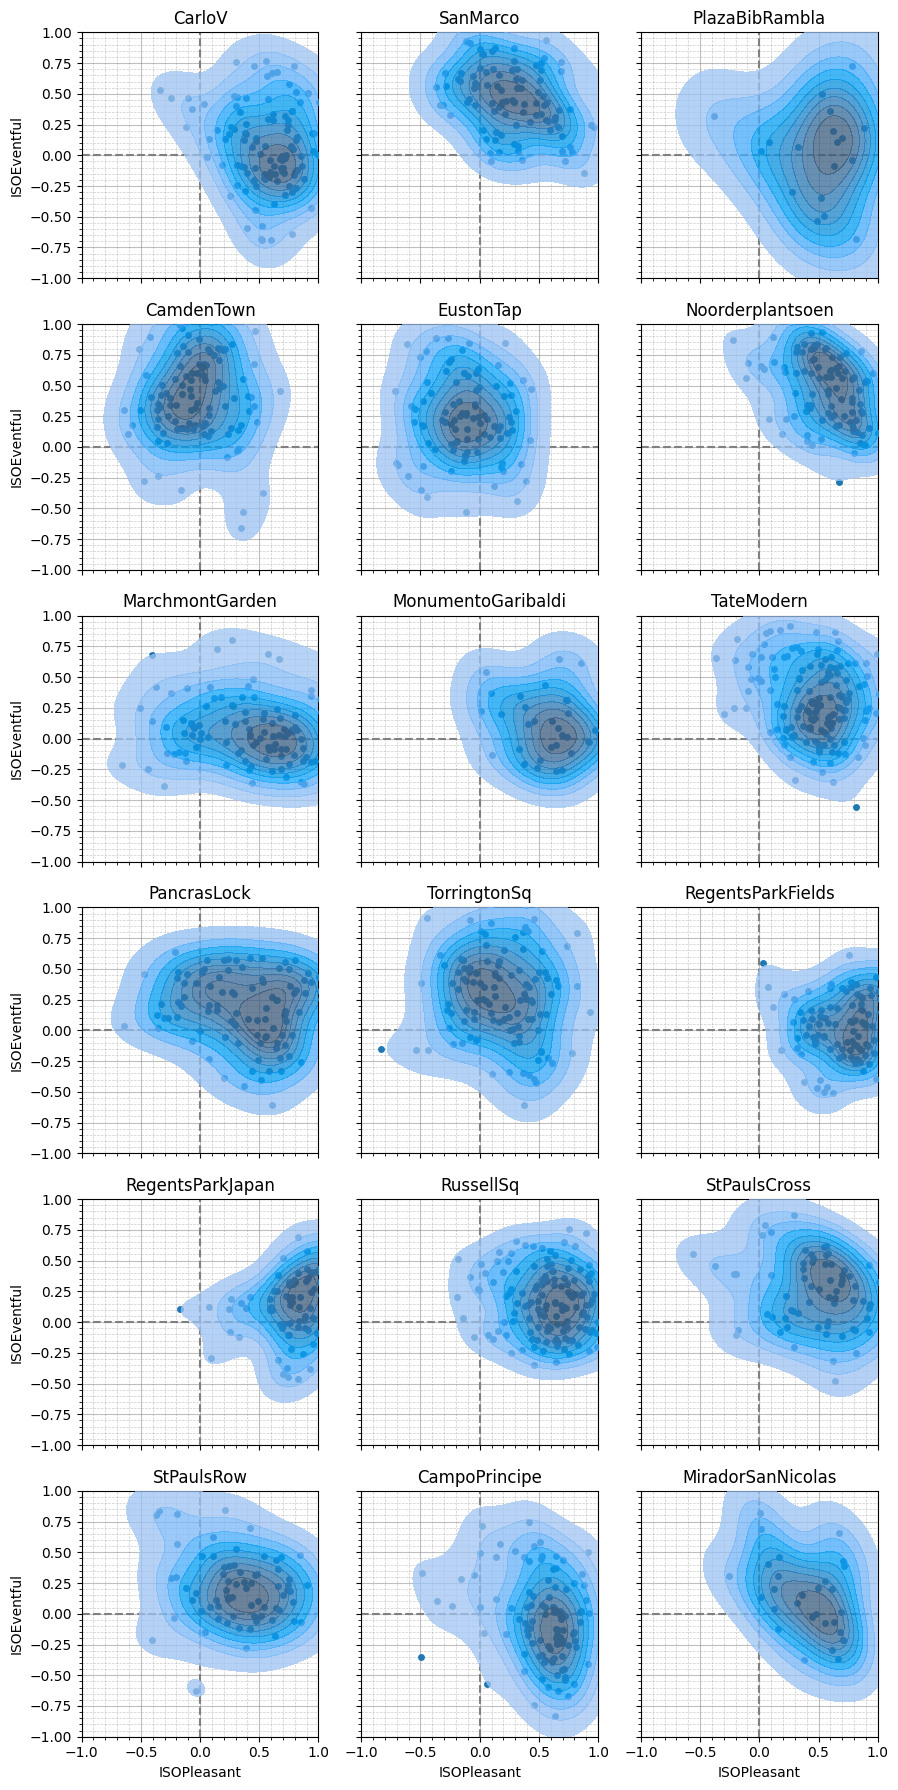

In [5]:
from soundscapy.utils.parameters import PAQ_IDS

for i, row in data.iterrows():
    lang = row["Language"]
    angles = LANGUAGE_ANGLES[lang]
    iso_pl, iso_ev = (
        sspy.surveys.adj_iso_pl(row[PAQ_IDS], angles, scale=4),
        sspy.surveys.adj_iso_ev(row[PAQ_IDS], angles, scale=4),
    )
    data.loc[i, "ISOPleasant"] = iso_pl
    data.loc[i, "ISOEventful"] = iso_ev

fig, axes = plt.subplots(6, 3, figsize=(9, 18), sharex=True, sharey=True)
for i, (loc, ax) in enumerate(zip(data.LocationID.unique(), axes.flatten())):
    sspy.plotting.density(
        data.query(f"LocationID == '{loc}'"),
        ax=ax,
        title=loc,
        # hue='Language',
    )

fig.tight_layout()

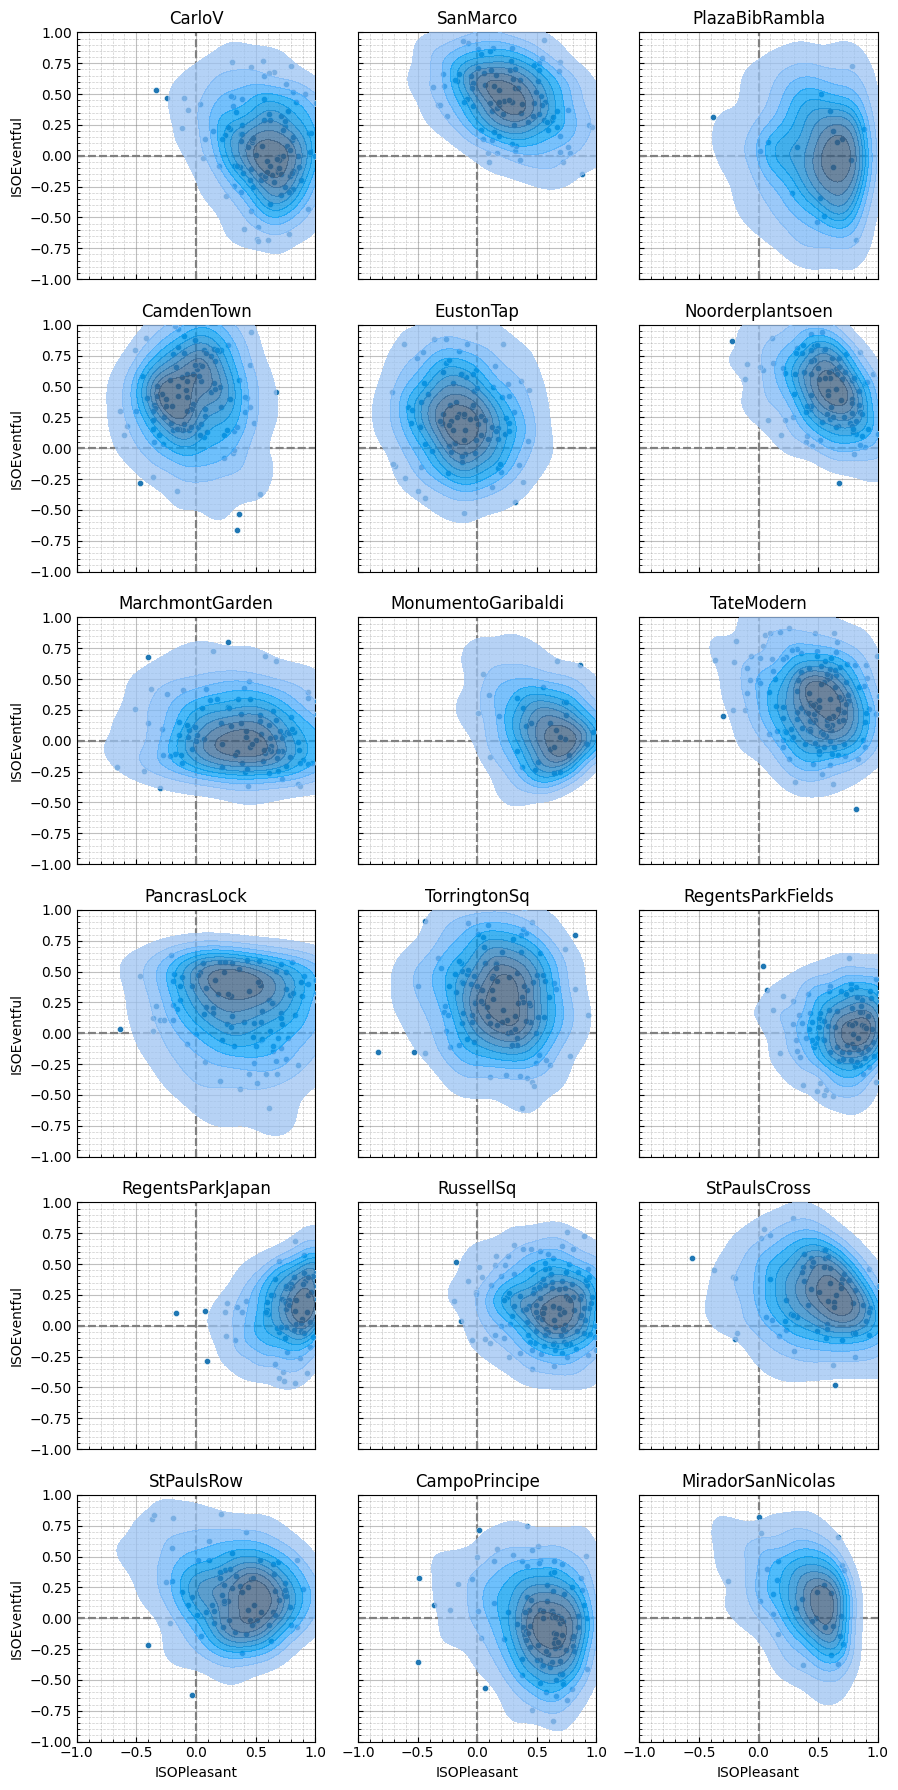

In [6]:
# Plotting distribution density with empirical scatter

fig, axes = plt.subplots(6, 3, figsize=(9, 18), sharex=True, sharey=True)
for i, (loc, ax) in enumerate(zip(data.LocationID.unique(), axes.flatten())):
    loc_msn = MultiSkewNorm()
    loc_msn.fit(
        data=data.query(f"LocationID == '{loc}'")[["ISOPleasant", "ISOEventful"]]
    )
    loc_msn.sample(1000)
    loc_Y = pd.DataFrame(loc_msn.sample_data, columns=["ISOPleasant", "ISOEventful"])

    sspy.plotting.scatter(
        data.query(f"LocationID == '{loc}'"),
        ax=ax,
        title=loc,
    )
    sspy.plotting.density(
        loc_Y,
        ax=ax,
        title=loc,
        incl_scatter=False,
        # hue='Language',
    )

fig.tight_layout()

## The Soundscape Perception Index (SPI)

The SPI works by assessing the assessed (or calculated) distribution of soundscape responses against a target distribution. This target distribution represents the goal for the soundscape design. Since we consider a location's soundscape perception to be the collective perception of its users, it is crucial that the target includes both the central tendency and the distribution. 

### Note: Distributions in the circumplex

We should begin by discussing how soundscape circumplex distributions are defined. The circumplex is defined by two axes: $P_{ISO}$ and $E_{ISO}$ which are limited to the range $[-1,1]$. Typically the distribution of collective perception of a soundscape is also not symmetrical, therefore making it a skewed distribution. A soundscape distribution is thus a two-dimensional truncated skew-normal distribution.

The skew-normal distribution is defined by three parameters: location, scale and shape. The location parameter defines the centre of the distribution, the scale parameter defines the spread of the distribution, and the shape parameter defines the skew of the distribution. The skew-normal distribution is defined as:

$$
f(x; a, \omega, \alpha) = \frac{2}{\omega} \phi \left( \frac{x-a}{\omega} \right) \Phi \left( \alpha \frac{x-a}{\omega} \right)
$$

where $\phi$ and $\Phi$ are the standard normal probability density function and cumulative distribution function respectively. The skew-normal distribution is thus a generalisation of the normal distribution, with the shape parameter $\alpha$ defining the skew. A positive shape parameter results in a right-skewed distribution, and a negative shape parameter results in a left-skewed distribution.

Truncated skew-normal distribution: https://www-tandfonline-com.libproxy.ucl.ac.uk/doi/epdf/10.1080/03610910902936109?needAccess=true

To generate the truncated skew-normal distribution, we use rejection sampling. This is a method of generating a distribution by sampling from a simpler distribution and rejecting samples that do not fit the target distribution. In this case, we sample from a skew-normal distribution (`scipy.stats.skewnorm`) and reject samples that are outside of the range $[-1,1]$.

#### Example - Calculating the moments of location's distribution and generating the equivalent distribution using rejection sampling



In [62]:
test_loc = "SanMarco"
test_data = sspy.isd.select_location_ids(data, test_loc)

msn = MultiSkewNorm()
msn.fit(data=test_data[["ISOPleasant", "ISOEventful"]])

msn.summary()

Fitted from data. n = 95
Direct Parameters:
xi:    [[0.065 0.629]]
omega: [[ 0.149 -0.064]
 [-0.064  0.101]]
alpha: [ 0.791 -0.767]


Centred Parameters:
mean:  [[0.283 0.451]]
sigma: [[ 0.102 -0.026]
 [-0.026  0.07 ]]
skew:  [ 0.136 -0.131]


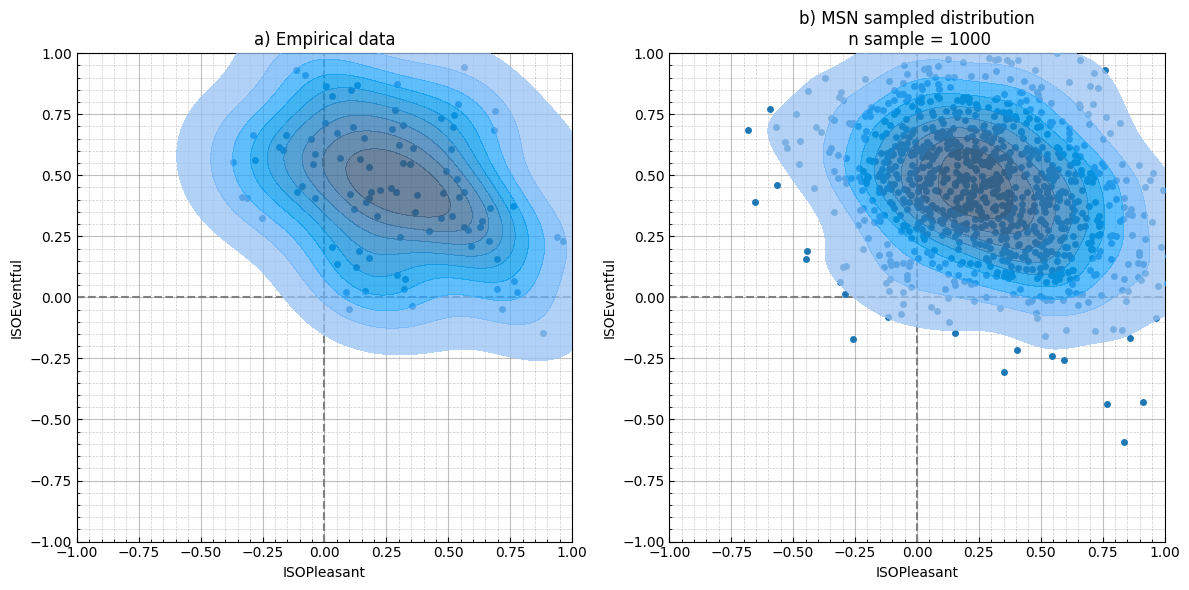

In [63]:
#| label: fig-dist-example
#| fig-cap: Example of fitting and sampling from a multivariate skew-normal distribution for data from the Piazza San Marco location.

Y = msn.sample(1000, return_sample=True)
Y = pd.DataFrame(Y, columns=["ISOPleasant", "ISOEventful"])
D, p = msn.ks2ds(test_data[["ISOPleasant", "ISOEventful"]])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sspy.plotting.density(
    test_data,
    ax=axes[0],
    density_type="full",
    title=f"a) Empirical data",
)
sspy.plotting.density(
    Y, ax=axes[1], density_type="full", title="b) MSN sampled distribution\n n sample = 1000"
)
plt.tight_layout()

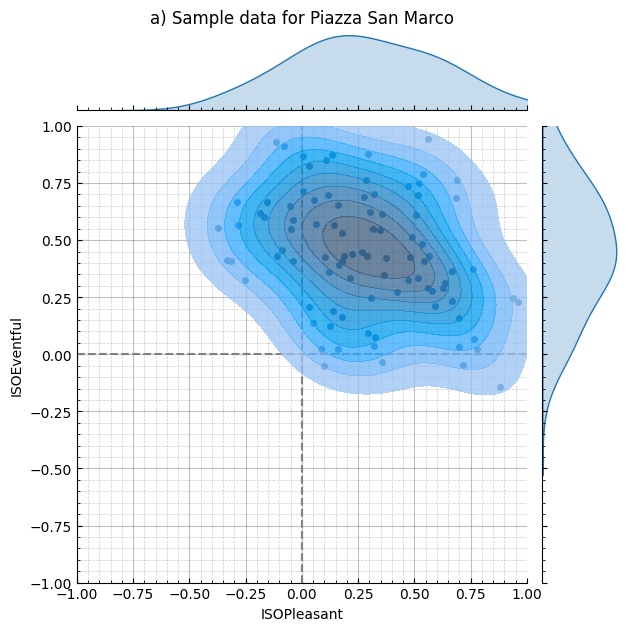

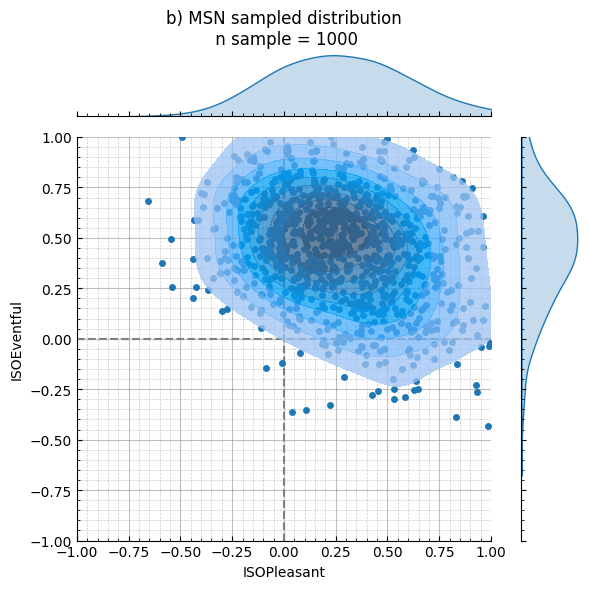

In [77]:
Y = msn.sample(1000, return_sample=True)
Y = pd.DataFrame(Y, columns=["ISOPleasant", "ISOEventful"])
D, p = msn.ks2ds(test_data[["ISOPleasant", "ISOEventful"]])

sspy.plotting.jointplot(
    test_data,
    density_type="full",
    title=f"a) Sample data for Piazza San Marco",
)
sspy.plotting.jointplot(
    Y, density_type="full", title="b) MSN sampled distribution\n n sample = 1000"
)
plt.tight_layout()

In [9]:
# Universal pleasant target
target_1 = MultiSkewNorm()
target_1.define_dp(
    xi = np.array([0.5, 0.0]),
    omega = np.array(
        [[0.2, 0],
         [0, 0.2]]),
    alpha = np.array([1, 0])
)
target_2 = MultiSkewNorm()
target_2.define_dp(
    xi = np.array([[1.0, -0.4]]),
    omega = np.array([[ 0.17, -0.04],
              [-0.04,  0.09]]),
    alpha = np.array([-8,  1])
    )

target_3 = MultiSkewNorm()
target_3.define_dp(
    xi=np.array([0.5, 0.7]),
    omega=np.array([[0.1, 0.05], [0.05, 0.1]]),
    alpha=np.array([0, -5]),
)

Y_1 = target_1.sample(1000, return_sample=True)
Y_1 = pd.DataFrame(Y_1, columns=["ISOPleasant", "ISOEventful"])
Y_2 = target_2.sample(1000, return_sample=True)
Y_2 = pd.DataFrame(Y_2, columns=["ISOPleasant", "ISOEventful"])
Y_3 = target_3.sample(1000, return_sample=True)
Y_3 = pd.DataFrame(Y_3, columns=["ISOPleasant", "ISOEventful"])


<Axes: title={'center': 'c) Target 3'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

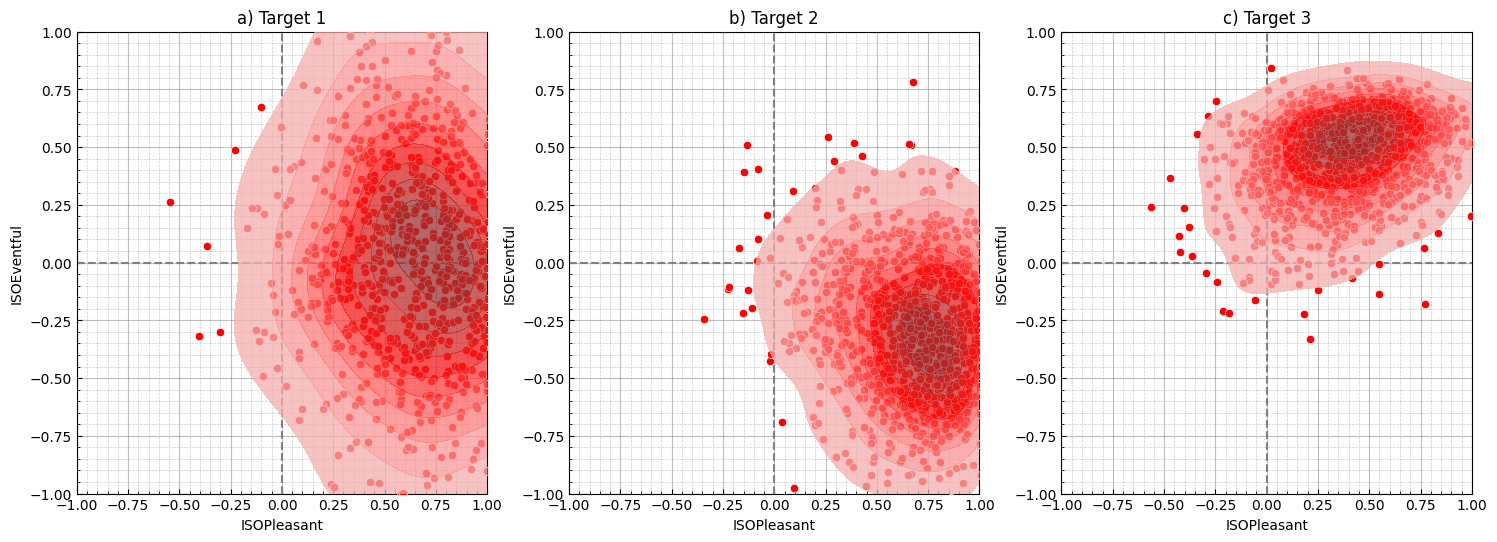

In [71]:
#| label: fig-targets
#| fig-cap: Example of defining and sampling from three arbitrary bespoke targets.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sspy.plotting.density(
    Y_1,
    ax=axes[0],
    density_type="full",
    title="a) Target 1",
    color='red',
    scatter_kws={'color': 'red'}
)
sspy.plotting.density(
    Y_2, ax=axes[1], density_type="full", title="b) Target 2", color='red', scatter_kws={'color': 'red'}
)
sspy.plotting.density(
    Y_3, ax=axes[2], density_type="full", title="c) Target 3", color='red', scatter_kws={'color': 'red'}
)

In [11]:
test_data

,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,THD_THD,THD_Min,THD_Max,THD_L5,THD_L10,THD_L50,THD_L90,THD_L95,ISOPleasant,ISOEventful
37,SanMarco,SanMarco1,AM01,22,2019-02-28 11:49:46,2019-02-28 12:11:44,45.433663,12.339658,eng,engISO2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115621,0.697896
38,SanMarco,SanMarco1,AM01,23,2019-02-28 11:49:46,2019-02-28 12:11:44,45.433663,12.339658,eng,engISO2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097335,-0.049440
39,SanMarco,SanMarco1,AM05,29,2019-02-28 13:17:51,2019-02-28 13:35:24,45.433663,12.339658,eng,engISO2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.881122,-0.145284
40,SanMarco,SanMarco1,AM06,30,2019-02-28 13:35:30,2019-02-28 13:48:52,45.433663,12.339658,eng,engISO2018,...,-1.99,-10.84,63.43,40.29,30.96,9.51,-6.71,-8.09,0.224755,0.441176
41,SanMarco,SanMarco1,AM06,31,2019-02-28 13:30:58,2019-02-28 13:48:30,45.433663,12.339658,eng,engISO2018,...,-1.99,-10.84,63.43,40.29,30.96,9.51,-6.71,-8.09,0.354762,-0.035378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,SanMarco,SanMarco3,SM310,67,2019-03-03 15:50:00,2019-03-03 16:00:00,45.433663,12.339658,ita,itaSSIDv1,...,-0.84,-5.27,59.61,46.55,37.15,13.91,-2.76,-3.29,-0.312480,0.406874
1605,SanMarco,SanMarco3,SM310,68,2019-03-03 15:50:00,2019-03-03 16:00:00,45.433663,12.339658,ita,itaSSIDv1,...,-0.84,-5.27,59.61,46.55,37.15,13.91,-2.76,-3.29,0.138546,0.188243
1606,SanMarco,SanMarco3,SM311,69,2019-03-03 16:04:00,2019-03-03 16:14:00,45.433663,12.339658,ita,itaSSIDv1,...,-0.98,-6.16,60.52,47.28,36.71,12.32,-3.74,-4.54,0.697704,0.033374
1607,SanMarco,SanMarco3,SM312,70,2019-03-03 16:12:00,2019-03-03 16:22:00,45.433663,12.339658,ita,itaSSIDv1,...,-0.93,-4.61,62.22,47.30,38.36,13.51,-2.08,-2.58,0.636848,0.311914


In [32]:
D_1 = utils.ks2d2s(
    test_data = test_data[['ISOPleasant', 'ISOEventful']], 
    target_data = Y_1,
    extra=True
)
D_2 = utils.ks2d2s(
    test_data = test_data[['ISOPleasant', 'ISOEventful']], 
    target_data = Y_2,
    extra=True
)
D_3 = utils.ks2d2s(
    test_data = test_data[['ISOPleasant', 'ISOEventful']], 
    target_data = Y_3,
    extra=True
)

In [33]:
#| label: tbl-ks-test
#| tbl-cap: Kolmogorov-Smirnov test comparing the empirical test distribution (Piazza San Marco) against three soundscape target distributions.
from IPython.display import Markdown
from tabulate import tabulate

D_tbl = [['tgt_1', D_1[1].round(2), D_1[0]],
         ['tgt_2', D_2[1].round(2), D_2[0]],
         ['tgt_3', D_3[1].round(2), D_2[0]]]
Markdown(tabulate(
    D_tbl,
    headers = ["Target", "D", "p"],
    tablefmt='grid'
))

+----------+------+-------------+
| Target   |    D |           p |
+==========+======+=============+
| tgt_1    | 0.64 | 2.48761e-23 |
+----------+------+-------------+
| tgt_2    | 0.82 | 5.87603e-38 |
+----------+------+-------------+
| tgt_3    | 0.28 | 5.87603e-38 |
+----------+------+-------------+

<Axes: title={'center': 'San Marco compared against target\nD=0.28, p=0.0001'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

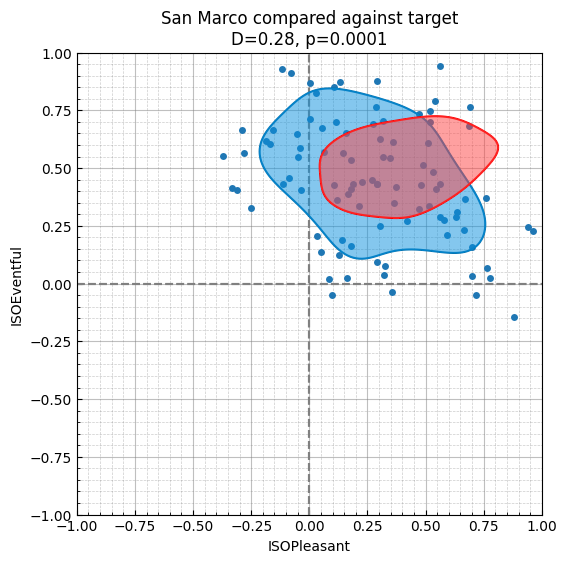

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

sspy.plotting.density(
    sspy.isd.select_location_ids(data, "SanMarco"),
    ax=ax,
    density_type="simple",
    label='test',
)
sspy.plotting.density(
    x=target_3.sample_data[:, 0],
    y=target_3.sample_data[:, 1],
    ax=ax,
    incl_scatter=False,
    density_type="simple",
    label='target',
    title=f"San Marco compared against target\nD={D_3[1].round(2)}, p={D_3[0].round(4)}",
    color='red'
)

In [73]:
spis = {}
for location in data.LocationID.unique():
    loc_data = sspy.isd.select_location_ids(data, location)[['ISOPleasant', 'ISOEventful']]
    spi_res = [utils.spi(loc_data, target_data) for target_data in [Y_1, Y_2, Y_3]]
    spis[location] = spi_res
spis_df = pd.DataFrame(spis).T
spis_df.columns = ['tgt_1', 'tgt_2', 'tgt_3']
# spis_df

In [74]:
def table_fill(spis_df, idx):
    tgt_1_order = spis_df['tgt_1'].sort_values(ascending=False)
    tgt_2_order = spis_df['tgt_2'].sort_values(ascending=False)
    tgt_3_order = spis_df['tgt_3'].sort_values(ascending=False)

    def tgt_str(tgt_order, idx):
        return f"{tgt_order.values[idx]}   {tgt_order.index[idx]}"

    return [f"{idx+1}", tgt_str(tgt_1_order, idx), tgt_str(tgt_2_order, idx), tgt_str(tgt_3_order, idx)]


In [76]:
#| label: tbl-ex-spis
#| tbl-cap: SPI scores and rankings for the soundscapes of locations included in the International Soundscape Database (ISD). 
spis_tbl = [table_fill(spis_df, idx) for idx in range(len(spis_df))]
tabulate.PRESERVE_WHITESPACE = True
Markdown(tabulate(
    spis_tbl,
    headers = ["Ranking", "$SPI_1$ (pleasant)", "$SPI_2$ (calm)", "$SPI_3$ (vibrant)"],
    tablefmt='pipe',
))

|   Ranking | $SPI_1$ (pleasant)      | $SPI_2$ (calm)          | $SPI_3$ (vibrant)       |
|----------:|:------------------------|:------------------------|:------------------------|
|         1 | 72   CarloV             | 64   CampoPrincipe      | 72   SanMarco           |
|         2 | 70   RegentsParkFields  | 54   CarloV             | 62   TateModern         |
|         3 | 64   CampoPrincipe      | 51   RegentsParkFields  | 60   StPaulsCross       |
|         4 | 64   RegentsParkJapan   | 50   PlazaBibRambla     | 59   Noorderplantsoen   |
|         5 | 63   PlazaBibRambla     | 46   MarchmontGarden    | 54   PancrasLock        |
|         6 | 62   RussellSq          | 44   MonumentoGaribaldi | 54   TorringtonSq       |
|         7 | 62   MarchmontGarden    | 41   RussellSq          | 47   StPaulsRow         |
|         8 | 61   PancrasLock        | 40   PancrasLock        | 47   RussellSq          |
|         9 | 61   MonumentoGaribaldi | 39   RegentsParkJapan   | 46   MiradorSanNicolas  |
|        10 | 55   StPaulsCross       | 32   StPaulsCross       | 42   CamdenTown         |
|        11 | 50   TateModern         | 32   MiradorSanNicolas  | 40   CarloV             |
|        12 | 50   StPaulsRow         | 31   TateModern         | 36   MonumentoGaribaldi |
|        13 | 46   MiradorSanNicolas  | 30   TorringtonSq       | 34   MarchmontGarden    |
|        14 | 41   Noorderplantsoen   | 29   StPaulsRow         | 33   PlazaBibRambla     |
|        15 | 39   TorringtonSq       | 17   SanMarco           | 32   CampoPrincipe      |
|        16 | 35   SanMarco           | 16   Noorderplantsoen   | 31   EustonTap          |
|        17 | 22   CamdenTown         | 14   EustonTap          | 27   RegentsParkFields  |
|        18 | 17   EustonTap          | 14   CamdenTown         | 27   RegentsParkJapan   |

In [17]:
spis_df['tgt_1'].sort_values(ascending=False)

RegentsParkFields     72
CarloV                70
RegentsParkJapan      65
CampoPrincipe         62
MarchmontGarden       62
PlazaBibRambla        61
RussellSq             61
MonumentoGaribaldi    61
PancrasLock           59
StPaulsCross          52
TateModern            48
StPaulsRow            47
MiradorSanNicolas     42
Noorderplantsoen      40
TorringtonSq          37
SanMarco              33
CamdenTown            22
EustonTap             16
Name: tgt_1, dtype: int64

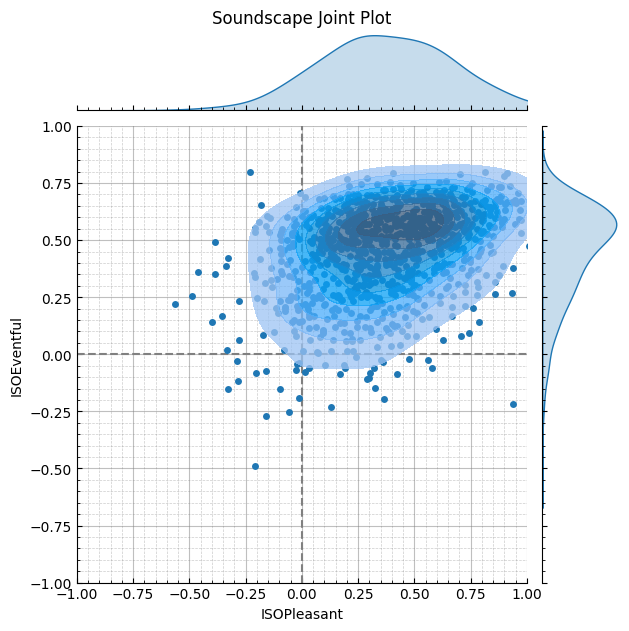

In [18]:
# Universal pleasant target
# target = (
#     np.array([0.5, 0.0]),
#     np.array(
#         [[0.2, 0],
#          [0, 0.2]]),
#     np.array([1, 0])
# )
# target = (
#     np.array([[1.03906292, 0.05335578]]),
#     np.array([[ 0.16551194, -0.04028515],
#               [-0.04028515,  0.08754524]]),
#     np.array([-8.62309592,  1.07337721])
#     )

target = MultiSkewNorm()
target.define_dp(
    xi=np.array([0.5, 0.7]),
    omega=np.array([[0.1, 0.05], [0.05, 0.1]]),
    alpha=np.array([0, -5]),
)
target.sample(1000)
target.sspy_plot()

<Axes: title={'center': 'Target Density'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

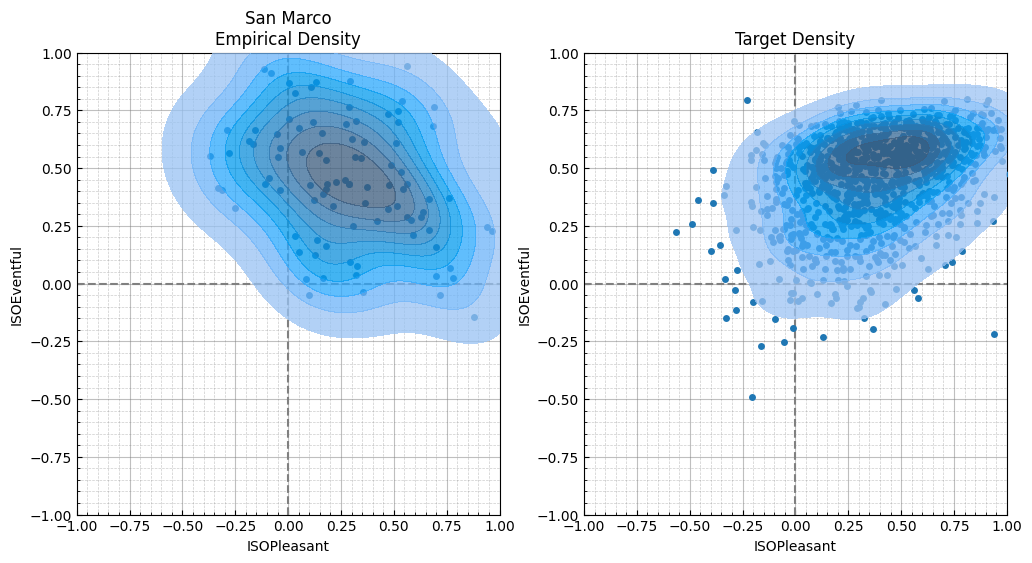

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sspy.plotting.density(
    test_data, incl_scatter=True, title="San Marco\nEmpirical Density", ax=axes[0]
)
sspy.plotting.density(
    pd.DataFrame(target.sample_data, columns=["ISOPleasant", "ISOEventful"]),
    incl_scatter=True,
    title="Target Density",
    ax=axes[1],
)

Once the target is defined, we will generate a set of points that represent the target distribution. 

Now that our target has been defined, we can calculate the SPI for a given set of responses. We will use the responses from Piazza San Marco in Venice, Italy, as an example.

In [20]:
test_spi = target.spi(data.query("LocationID == 'SanMarco'")[["ISOPleasant", "ISOEventful"]])
print(f"San Marco SPI = {test_spi}")

San Marco SPI = 72


<Axes: title={'center': 'Piazza San Marco\nSPI = 72'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

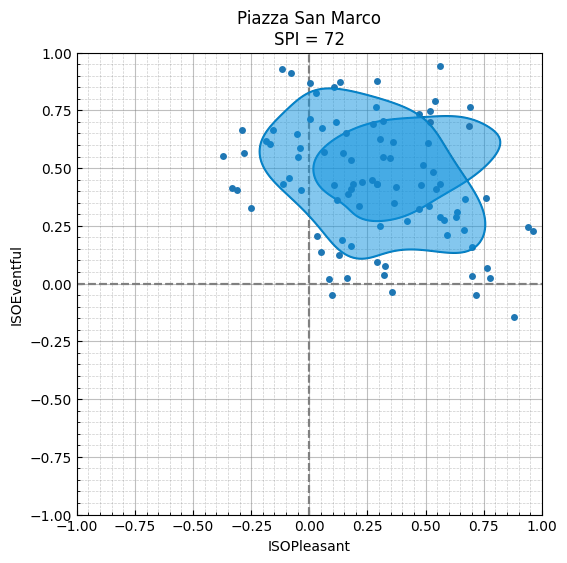

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))

sspy.plotting.density(
    x=target.sample_data[:, 0],
    y=target.sample_data[:, 1],
    ax=ax,
    incl_scatter=False,
    density_type="simple",
    title="",
)
sspy.plotting.density(
    sspy.isd.select_location_ids(data, "SanMarco"),
    ax=ax,
    density_type="simple",
    title=f"Piazza San Marco\nSPI = {test_spi}",
)

We can compare this against another location, such as St Pancras Lock.

<Axes: title={'center': 'Pancras Lock\nSPI = 55'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

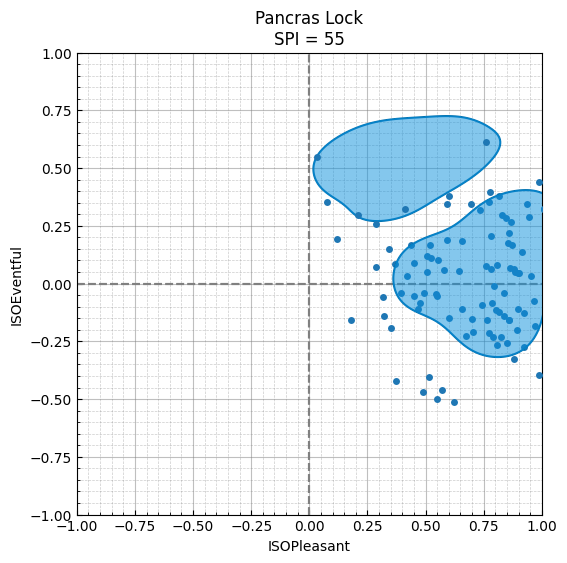

In [22]:
test_spi = target.spi(
    sspy.isd.select_location_ids(data, "PancrasLock")[["ISOPleasant", "ISOEventful"]]
)
fig, ax = plt.subplots(figsize=(6, 6))

sspy.plotting.density(
    x=target.sample_data[:, 0],
    y=target.sample_data[:, 1],
    ax=ax,
    incl_scatter=False,
    density_type="simple",
    title="",
)
sspy.plotting.density(
    sspy.isd.select_location_ids(data, "RegentsParkFields"),
    ax=ax,
    density_type="simple",
    title=f"Pancras Lock\nSPI = {test_spi}",
)

SPI scores assessed against a target should not inherently be considered a measure of the quality of the soundscape - instead it reflects the degree to which the soundscape matches the target. A high SPI score does not necessarily mean that the soundscape is of high quality, but rather that the soundscape is of high quality *according to the target*.

The $SPI_{bespoke}$ thus provides a method for scoring and ranking the success of a soundscape design against the designer's goals. Sticking with our defined target, we can assess all of the locations in the ISD and see which locations best match our target.

In [23]:
loc_bespoke = {}
for location in data.LocationID.unique():
    loc_bespoke[location] = target.spi(
        sspy.isd.select_location_ids(data, location)[["ISOPleasant", "ISOEventful"]]
    )

loc_bespoke = pd.DataFrame.from_dict(loc_bespoke, orient="index", columns=["SPI"])
loc_bespoke.sort_values(by="SPI", ascending=False, inplace=True)
loc_bespoke

,SPI
SanMarco,72
TateModern,62
StPaulsCross,60
Noorderplantsoen,59
PancrasLock,55
TorringtonSq,55
StPaulsRow,49
MiradorSanNicolas,49
RussellSq,47
CamdenTown,43


Assessed against a different target would result in a different ranking:

Fitted from direct parameters.
Direct Parameters:
xi:    [-0.5 -0.5]
omega: [[0.1 0. ]
 [0.  0.2]]
alpha: [-0.85  1.5 ]


None


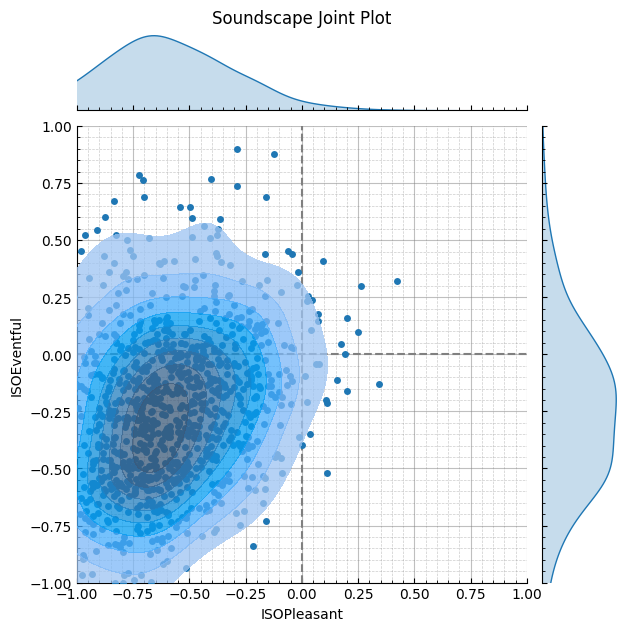

In [24]:
target = MultiSkewNorm()
target.define_dp(
    np.array([-0.5, -0.5]),
    np.array([[0.1, 0], [0, 0.2]]),
    np.array([-0.85, 1.5]),
)
target.summary()

target.sample(n=1000)
target.sspy_plot()

In [25]:
loc_bespoke_2 = {}
for location in data.LocationID.unique():
    loc_bespoke_2[location] = target.spi(
        sspy.isd.select_location_ids(data, location)[["ISOPleasant", "ISOEventful"]]
    )

loc_bespoke_2 = pd.DataFrame.from_dict(loc_bespoke_2, orient="index", columns=["SPI"])
loc_bespoke_2.sort_values(by="SPI", ascending=False, inplace=True)
loc_bespoke_2

,SPI
EustonTap,30
CamdenTown,20
MarchmontGarden,18
TorringtonSq,18
PancrasLock,17
PlazaBibRambla,14
StPaulsRow,14
StPaulsCross,10
CampoPrincipe,9
TateModern,8


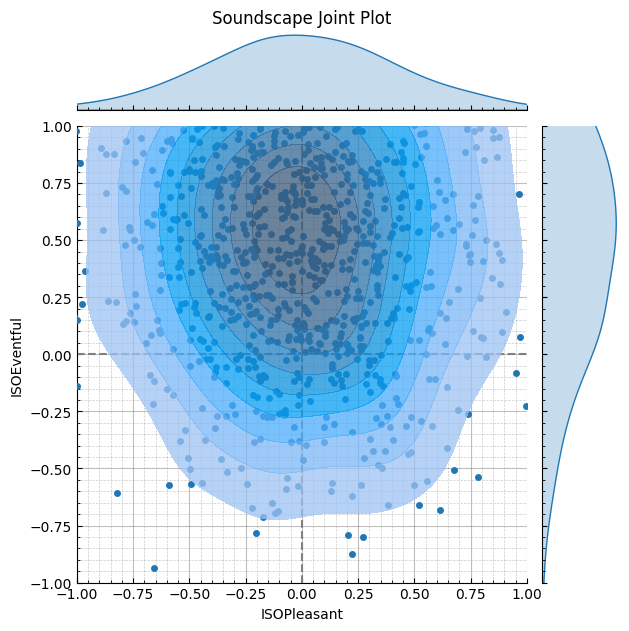

In [26]:
target1 = MultiSkewNorm()
target1.define_dp(
    np.array([-0.5, 0.5]), np.array([[0.1, 0], [0, 0.1]]), np.array([0, 0])
)
target1.sample()

target2 = MultiSkewNorm()
target2.define_dp(np.array([0.5, 0]), np.array([[0.1, 0], [0, 0.2]]), np.array([0, 0]))
target2.sample()

target_mix_y = target1.sample_data + target2.sample_data

target_mix_y = pd.DataFrame(target_mix_y, columns=["ISOPleasant", "ISOEventful"])

sspy.plotting.jointplot(target_mix_y)

---

## Defining multi-target SPIs

Above we have defined a single target to assess against. However, it is often useful to define multiple targets, for instance if different locations have different design goals. A simple version of this is clearly quite straightforward - simply define a table with a set of targets.


---

## Defining archetypes

Given the above method of defining and assessing against targets, users can define their target using whatever criteria they wish. However, a primary goal of this framework is to enable standard targets or sets of targets to be empirically defined. 

However, it is often useful to define targets based on the architectural typology of the location. For example, a park may have a different target to a road.

### Defining an overall quality rating

The overall quality rating is defined as the sum of the 'Appropriateness' and 'Overall Rating' scores. The overall quality rating is used to determine the overall quality of the soundscape, for that respondent. 


<Axes: xlabel='QualityRating', ylabel='Count'>

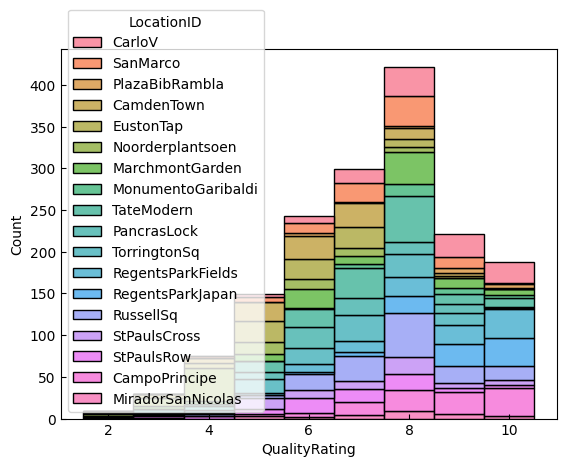

In [27]:
data["QualityRating"] = data.sss02 + data.sss01
# data['QualityRating'] = data.Appropriate + data.sss04 + data.sss05

sns.histplot(
    data=data, x="QualityRating", hue="LocationID", multiple="stack", discrete=True
)

In [28]:
data.LocationID.unique()

array(['CarloV', 'SanMarco', 'PlazaBibRambla', 'CamdenTown', 'EustonTap',
       'Noorderplantsoen', 'MarchmontGarden', 'MonumentoGaribaldi',
       'TateModern', 'PancrasLock', 'TorringtonSq', 'RegentsParkFields',
       'RegentsParkJapan', 'RussellSq', 'StPaulsCross', 'StPaulsRow',
       'CampoPrincipe', 'MiradorSanNicolas'], dtype=object)

In [29]:
# Define some architectural typologies
parks = [
    "RegentsParkFields",
    "RegentsParkJapan",
    "Noorderplantsoen",
    "StPaulsCross",
    "MiradorSanNicolas",
    "RussellSq",
    "LianhuanshanParkForest",
    "Noorderplantsoen",
    "PingshanPark",
    "ZhongshanPark",
]

walkways = [
    "MarchmontGarden",
    "MonumentoGaribaldi",
    "PancrasLock",
    "TateModern",
    "LianhuanshanParkEntrance",
]

squares = [
    "PlazaBibRambla",
    "SanMarco",
    "StPaulsRow",
    "CampoPrincipe",
    "CarloV",
    "DadongSquare",
    "OlympicSquare",
    "ZhongshanSquare",
]

roads = [
    "CamdenTown",
    "EustonTap",
    "TorringtonSq",
    "PingshanStreet",
]

In [30]:
# Assign architectural typologies to each data point
data.loc[data.LocationID.isin(parks), "ArchiType"] = "Park"
data.loc[data.LocationID.isin(walkways), "ArchiType"] = "Walkway"
data.loc[data.LocationID.isin(squares), "ArchiType"] = "Square"
data.loc[data.LocationID.isin(roads), "ArchiType"] = "Road"
data["ArchiType"] = data["ArchiType"].astype("category")

In [31]:
# Classify each point into a high or low soundscape quality
data["TypeSpecificQuality"] = "low"

# By using a quantile-based threshold, we are extracting the top x% of all responses from each typology
for type in data.ArchiType.unique():
    type_threshold = data.query("ArchiType == @type")["QualityRating"].quantile(0.75)
    # type_threshold = type_threshold if type_threshold > 8 else 8
    print(f"Threshold for {type} is {type_threshold}")
    rows = data.query(
        # "ArchiType == @type & QualityRating >= @type_threshold & ISOPleasant > 0", engine="python"
        # "ArchiType == @type & QualityRating >= @type_threshold", engine="python"
        "ArchiType == @type & QualityRating >= 8.0",
        engine="python",
    ).index
    data["TypeSpecificQuality"][rows] = "high"

Threshold for Square is 9.0
Threshold for Road is 7.0
Threshold for Park is 9.0
Threshold for Walkway is 8.0


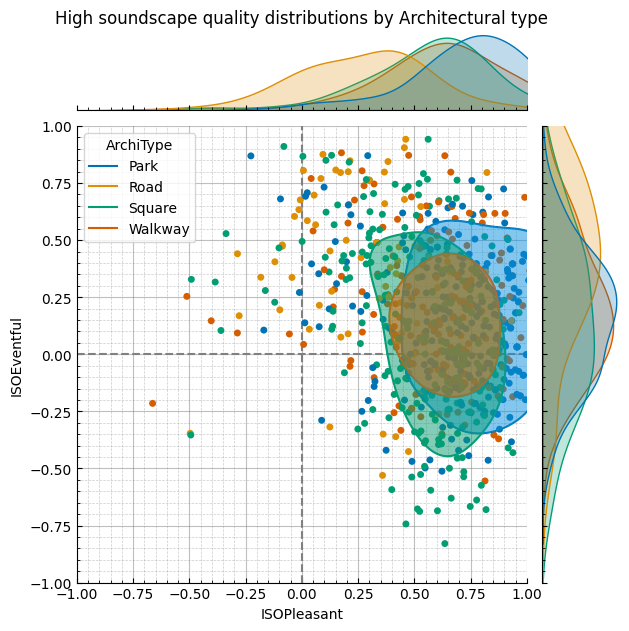

In [32]:
# Plot the high quality responses for each typology
sspy.plotting.jointplot(
    data.query("TypeSpecificQuality == 'high'"),
    hue="ArchiType",
    density_type="simple",
    # incl_scatter=False,
    title="High soundscape quality distributions by Architectural type",
)
plt.show()

In [33]:
# Calculate the distribution models for each type

m_parks = MultiSkewNorm()
m_parks.fit(
    data=data.query("ArchiType == 'Park' & TypeSpecificQuality == 'high'")[
        ["ISOPleasant", "ISOEventful"]
    ]
)
m_parks.sample()

m_road = MultiSkewNorm()
m_road.fit(
    data=data.query("ArchiType == 'Road' & TypeSpecificQuality == 'high'")[
        ["ISOPleasant", "ISOEventful"]
    ]
)
m_road.sample()

m_walkway = MultiSkewNorm()
m_walkway.fit(
    data=data.query("ArchiType == 'Walkway' & TypeSpecificQuality == 'high'")[
        ["ISOPleasant", "ISOEventful"]
    ]
)
m_walkway.sample()

m_square = MultiSkewNorm()
m_square.fit(
    data=data.query("ArchiType == 'Square' & TypeSpecificQuality == 'high'")[
        ["ISOPleasant", "ISOEventful"]
    ]
)
m_square.sample()

In [34]:
y_parks = pd.DataFrame(m_parks.sample_data, columns=["ISOPleasant", "ISOEventful"])
y_parks["ArchiType"] = "Park"
y_road = pd.DataFrame(m_road.sample_data, columns=["ISOPleasant", "ISOEventful"])
y_road["ArchiType"] = "Road"
y_walkway = pd.DataFrame(m_walkway.sample_data, columns=["ISOPleasant", "ISOEventful"])
y_walkway["ArchiType"] = "Walkway"
y_square = pd.DataFrame(m_square.sample_data, columns=["ISOPleasant", "ISOEventful"])
y_square["ArchiType"] = "Square"

gend_df = pd.concat([y_parks, y_road, y_walkway, y_square])

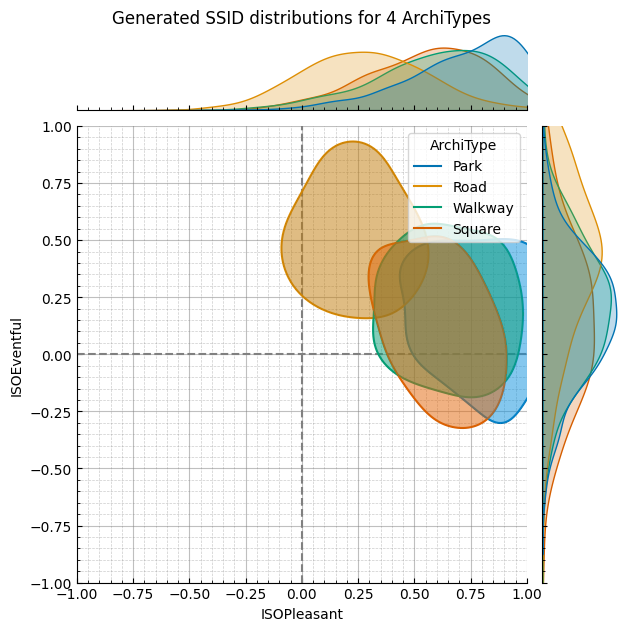

In [35]:
# plot
sspy.plotting.jointplot(
    gend_df,
    hue="ArchiType",
    density_type="simple",
    incl_scatter=False,
    title="Generated SSID distributions for 4 ArchiTypes",
)
plt.show()

In [36]:
# Put it all together
loc = "RegentsParkJapan"
architype = "Park"
res = m_parks.spi(
    data.query("LocationID == @loc")[["ISOPleasant", "ISOEventful"]]
)
print(f"{loc} SPI_{architype}: {res}")

loc = "MarchmontGarden"
architype = "Park"
res = m_parks.spi(
    data.query("LocationID == @loc")[["ISOPleasant", "ISOEventful"]]
)
print(f"{loc} SSID_{architype}: {res}")

loc = "EustonTap"
architype = "Road"
res = m_road.spi(
    data.query("LocationID == @loc")[["ISOPleasant", "ISOEventful"]]
)
print(f"{loc} SSID_{architype}: {res}")

RegentsParkJapan SPI_Park: 82
MarchmontGarden SSID_Park: 63
EustonTap SSID_Road: 48


## MLE for fitting the target distribution

Non-derivative/non-gradient based methods
- evolutionary algorithms
  - NSGA-II
- Simulated annealing
- 

Gradient-based approaches
- Giorgious recommends avoiding these


In [37]:
quality = pd.DataFrame(
    data.groupby("LocationID")["QualityRating"].mean().sort_values(ascending=False)
)
quality["Rank"] = range(1, len(quality) + 1)
quality

,QualityRating,Rank
LocationID,,
RegentsParkJapan,8.887640,1
CampoPrincipe,8.545455,2
PlazaBibRambla,8.500000,3
RegentsParkFields,8.392523,4
CarloV,8.304348,5
MonumentoGaribaldi,8.156250,6
RussellSq,7.751724,7
SanMarco,7.410526,8
MiradorSanNicolas,7.392857,9


In [38]:
quality = pd.DataFrame(
    data.groupby("LocationID")["QualityRating"].mean().sort_values(ascending=False)
)
quality["Rank"] = range(1, len(quality) + 1)
quality = quality.sort_index()["Rank"].copy()


def target_success(
    target: MultiSkewNorm, ranking: pd.Series, data: pd.DataFrame, n_sample=1000
):
    from scipy.stats import spearmanr

    assert len(ranking) == len(data.LocationID.unique())
    assert target.sample_data is not None, "Target has not been sampled"

    spis = {}
    for location in data.LocationID.unique():
        # test_spi = utils.spi(
        #     sspy.isd.select_location_ids(data, location)[["ISOPleasant", "ISOEventful"]],
        #     target.sample_data,
        # )
        test_spi = target.spi(
            sspy.isd.select_location_ids(data, location)[["ISOPleasant", "ISOEventful"]]
        )
        spis[location] = test_spi

    spi_ranks = pd.DataFrame.from_dict(spis, orient="index", columns=["SPI"])
    spi_ranks.sort_values(by="SPI", ascending=False, inplace=True)
    spi_ranks["Rank"] = range(1, len(spi_ranks) + 1)
    ranks = spi_ranks.sort_index()["Rank"]

    spearman = spearmanr(ranking, ranks)
    weighted_spi = sum([(1 / rank) * spi for rank, spi in zip(ranks, spi_ranks["SPI"])])

    return spearman, weighted_spi, spi_ranks


tgt = MultiSkewNorm()
tgt.define_dp(
    np.array([0.5, 0.7]),
    np.array([[0.1, 0.05], [0.05, 0.1]]),
    np.array([0, -5]),
)
tgt.sample()
target_success(tgt, quality, data)

(SignificanceResult(statistic=-0.4840041279669762, pvalue=0.04182551548646378),
 137.65192927987044,
                     SPI  Rank
 SanMarco             73     1
 TateModern           61     2
 StPaulsCross         60     3
 Noorderplantsoen     58     4
 PancrasLock          56     5
 TorringtonSq         56     6
 StPaulsRow           48     7
 MiradorSanNicolas    48     8
 RussellSq            47     9
 CamdenTown           44    10
 CarloV               39    11
 MonumentoGaribaldi   37    12
 PlazaBibRambla       36    13
 MarchmontGarden      35    14
 CampoPrincipe        33    15
 EustonTap            32    16
 RegentsParkFields    28    17
 RegentsParkJapan     27    18)